# Project Check In 2
#### Due 4/11/25

## Introduction
##### The "Crime Incidents in 2024" dataset, sourced from Data.gov, offers a detailed record of reported criminal activity by the Maryland Police Department throughout the year. Each entry typically includes the type of offense, the time and date it occurred, and the geographic location — ranging from specific coordinates to neighborhood-level data. Some records may also provide the status of the case or the outcome of the incident.This project explores the overarching question: What factors affect different types of offenses? By analyzing temporal patterns (such as time of day or day of week), geographic distribution, and other contextual variables,  our goal is to uncover how various factors influence the frequency and nature of specific crimes. Understanding these relationships can help inform public safety strategies, resource allocation, and predictive policing efforts.

In [45]:
# imports

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import ensemble


In [46]:
crime = pd.read_csv("Crime_Incidents_in_2024.csv")
print(crime.shape)
crime.head(10)

(29294, 25)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399622.2700,134352.6200,24093246,2024/06/19 14:52:56+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF NEW JERSEY AVENUE SE,399622.270000,134352.620000,...,007203 1,7203.0,Precinct 131,38.877004,-77.004353,CAPITOL RIVERFRONT,2024/06/19 14:50:00+00,2024/06/19 14:52:00+00,679448603,NaN
1,398579.1351,134828.4000,24131497,2024/08/27 01:13:37+00,EVENING,OTHERS,THEFT F/AUTO,300 - 399 BLOCK OF G STREET SW,398579.135069,134828.399995,...,010500 2,10500.0,Precinct 128,38.881289,-77.016376,SOUTHWEST,2024/08/26 18:51:00+00,2024/08/26 20:14:00+00,679448604,NaN
2,396836.0500,139850.4600,24120734,2024/08/07 07:10:35+00,MIDNIGHT,OTHERS,THEFT/OTHER,16TH STREET NW AND COLUMBIA ROAD NW,396836.050011,139850.459999,...,003901 1,3901.0,Precinct 39,38.926525,-77.036488,NaN,2024/08/04 01:00:00+00,2024/08/04 01:30:00+00,679449098,NaN
3,398010.0800,138818.9400,24168124,2024/10/30 03:40:30+00,MIDNIGHT,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF 8TH STREET NW,398010.080000,138818.940000,...,003500 3,3500.0,Precinct 37,38.917236,-77.022946,NaN,2024/10/29 04:00:00+00,2024/10/29 20:00:00+00,679449103,NaN
4,397424.6800,141258.2500,24172277,2024/11/05 23:15:06+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3900 - 3999 BLOCK OF 13TH STREET NW,397424.680000,141258.250000,...,002503 1,2503.0,Precinct 47,38.939209,-77.029705,NaN,2024/11/05 22:22:00+00,NaN,679449104,NaN
5,394459.1800,141888.0400,24179469,2024/11/18 22:40:03+00,EVENING,OTHERS,THEFT/OTHER,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,394459.180000,141888.040000,...,001303 1,1303.0,Precinct 34,38.944869,-77.063916,NaN,2024/11/18 22:07:00+00,2024/11/18 22:07:00+00,679449116,NaN
6,393720.8600,140689.0000,24074542,2024/05/18 16:39:42+00,DAY,OTHERS,THEFT/OTHER,3300 - 3399 BLOCK OF WISCONSIN AVENUE NW,393720.860000,140689.000000,...,001002 4,1002.0,Precinct 29,38.934062,-77.072422,NaN,2024/05/18 15:15:00+00,2024/05/18 15:25:00+00,679449118,NaN
7,399930.5000,143088.2800,24075222,2024/05/20 02:29:20+00,EVENING,OTHERS,THEFT/OTHER,5500 - 5529 BLOCK OF SOUTH DAKOTA AVENUE NE,399930.500000,143088.280000,...,009507 1,9507.0,Precinct 65,38.955698,-77.000802,NaN,2024/05/19 21:10:00+00,2024/05/20 00:12:00+00,679449119,NaN
8,397431.2200,138854.6100,24079135,2024/05/26 10:13:12+00,MIDNIGHT,GUN,ROBBERY,2000 - 2099 BLOCK OF 13TH STREET NW,397431.220000,138854.610000,...,004401 2,4401.0,Precinct 22,38.917556,-77.029621,NaN,2024/05/26 08:34:00+00,2024/05/26 10:08:00+00,679449120,NaN
9,400530.2627,132799.0566,24080364,2024/05/28 16:07:17+00,DAY,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF SHANNON PLACE SE,400530.262718,132799.056569,...,007401 1,7401.0,Precinct 119,38.863009,-76.993890,ANACOSTIA,2024/05/28 15:15:00+00,2024/05/28 15:25:00+00,679449121,NaN


In [47]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29294 non-null  float64
 1   Y                     29294 non-null  float64
 2   CCN                   29294 non-null  int64  
 3   REPORT_DAT            29294 non-null  object 
 4   SHIFT                 29294 non-null  object 
 5   METHOD                29294 non-null  object 
 6   OFFENSE               29294 non-null  object 
 7   BLOCK                 29294 non-null  object 
 8   XBLOCK                29294 non-null  float64
 9   YBLOCK                29294 non-null  float64
 10  WARD                  29290 non-null  float64
 11  ANC                   29290 non-null  object 
 12  DISTRICT              28549 non-null  float64
 13  PSA                   28826 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29290 non-null  object 
 15  BLOCK_GROUP        

### Data Cleaning

In [48]:
# making dates and times easier to read
crime['date'] = pd.to_datetime(crime['REPORT_DAT']).dt.date
crime['time'] = pd.to_datetime(crime['REPORT_DAT']).dt.time

crime['start_date'] = pd.to_datetime(crime['START_DATE']).dt.date
crime['end_date'] = pd.to_datetime(crime['END_DATE']).dt.date
crime['start_time'] = pd.to_datetime(crime['START_DATE']).dt.time
crime['end_time'] = pd.to_datetime(crime['END_DATE']).dt.time


In [49]:
# dropping unnecessary features
crime.drop(['XBLOCK','YBLOCK', 'BLOCK_GROUP', 'BLOCK', 'PSA',
                    'ANC','LATITUDE','LONGITUDE','CENSUS_TRACT',
                    'BID','OBJECTID','OCTO_RECORD_ID','VOTING_PRECINCT',
                    'START_DATE', 'END_DATE','REPORT_DAT'], axis=1, inplace=True)

# drop missing values
crime = crime.dropna()
crime.head()

,X,Y,CCN,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,NEIGHBORHOOD_CLUSTER,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
5,394459.1800,141888.04,24179469,EVENING,OTHERS,THEFT/OTHER,3.0,2.0,Cluster 12,2024-11-18,22:40:03,2024-11-18,2024-11-18,22:07:00,22:07:00


In [50]:
# Renaming features
crime = crime.rename(columns={'X': 'x_coordinate', 'Y': 'y_coordinate','SHIFT':'shift','METHOD':'method',
                              'OFFENSE':'offense','WARD':'ward','DISTRICT':'district',
                              'NEIGHBORHOOD_CLUSTER':'neighborhood_cluster'})

crime.head()


,x_coordinate,y_coordinate,CCN,shift,method,offense,ward,district,neighborhood_cluster,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
5,394459.1800,141888.04,24179469,EVENING,OTHERS,THEFT/OTHER,3.0,2.0,Cluster 12,2024-11-18,22:40:03,2024-11-18,2024-11-18,22:07:00,22:07:00


### Feature Description
1. **X_coordinate**: x coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters.
2. **Y_coordinate**: y coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters.
3. **CCN**: criminal complaint number, a unique identifer assigned by MPD to each incident.
4. **Shift**: MPD member's tour of duty associated with time the report was taken. Day shift is between 0700 and 1500, evening shift is between 1500 and 2300, and midnight shift is between 2300 and 0700.
5. **Method**: The type of weapon used to commit the crime
6. **Offense**: 
-  **Theft/auto** is specifically refering to theft within a motor vehicle.
-  **Theft/other** is various theft types beyond auto theft.
-  **Motor vehicle theft** is theft of a motor vehicle.
-  **Burglary** is unlawful entry into a structure with intent to commit a crime.
-  **Robbery** is the taking or attempting to take anything of value of a person or persons.
-  **Arson** is the act of deliberately setting fire to property.
-  **Assault w/Dangerous weapon** is involving the use of a weapon capable of harming another person.
-  **Sex abuse** is abusive sexual behavior by one person upon another.
-  **Homicide** is the killing of one person to another. 
7. **Ward**: the district's ward identifier, found from MAR (Master Address Repository) geocoder.
8. **District**: the police district.
9. **neighborhood_cluster**: homes or businesses that are grouped together on a tract of land.
10. **date**: The date the offense was reported by MPD, may be later than when the crime is actually committed.
11. **time**: the time when the report was taken.
12. **start_date**: the crime incident's start date.
13. **end_date**: the crime incident's end date.
14. **start_time**: the crime incident's start time.
15. **start_time**: the crime incident's end time.


## Exploratory Data Analysis

In [51]:
# different types of crimes
(
    crime
    ['offense']
    .value_counts()
    .reset_index()
    .head(10) 
)

,offense,count
0,THEFT/OTHER,11872
1,THEFT F/AUTO,6246
2,MOTOR VEHICLE THEFT,4607
3,ROBBERY,1811
4,BURGLARY,885
5,ASSAULT W/DANGEROUS WEAPON,814
6,HOMICIDE,152
7,SEX ABUSE,129
8,ARSON,4


In [52]:
# different types of neighborhoods
(
    crime
    ['neighborhood_cluster']
    .value_counts()
    .reset_index()
)

,neighborhood_cluster,count
0,Cluster 2,1954
1,Cluster 25,1786
2,Cluster 8,1528
3,Cluster 23,1505
4,Cluster 3,1451
5,Cluster 18,1276
6,Cluster 6,1218
7,Cluster 21,1165
8,Cluster 26,1024
9,Cluster 7,961


In [53]:
# Get the count of each offense by neighborhood cluster
offense_counts = crime.groupby(['neighborhood_cluster', 'offense']).size().unstack(fill_value=0)
offense_counts.head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0,11,32,1,54,34,5,121,430
Cluster 10,0,2,4,0,15,2,1,89,98
Cluster 11,0,1,9,0,20,6,1,89,209
Cluster 12,0,3,5,1,20,5,1,67,173
Cluster 13,0,0,11,0,10,1,0,65,41


In [54]:
total_crimes_per_cluster = offense_counts.sum(axis=1)
# find proportions
offense_proportions = ((offense_counts.T / total_crimes_per_cluster).T).round(2)

# Print in dataframe
pd.DataFrame(offense_proportions).head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0.0,0.02,0.05,0.0,0.08,0.05,0.01,0.18,0.62
Cluster 10,0.0,0.01,0.02,0.0,0.07,0.01,0.00,0.42,0.46
Cluster 11,0.0,0.00,0.03,0.0,0.06,0.02,0.00,0.27,0.62
Cluster 12,0.0,0.01,0.02,0.0,0.07,0.02,0.00,0.24,0.63
Cluster 13,0.0,0.00,0.09,0.0,0.08,0.01,0.00,0.51,0.32


## Plots

THEFT/OTHER: 44.77%
THEFT F/AUTO: 23.55%
MOTOR VEHICLE THEFT: 17.37%
ROBBERY: 6.83%
BURGLARY: 3.34%
ASSAULT W/DANGEROUS WEAPON: 3.07%
HOMICIDE: 0.57%
SEX ABUSE: 0.49%
ARSON: 0.02%


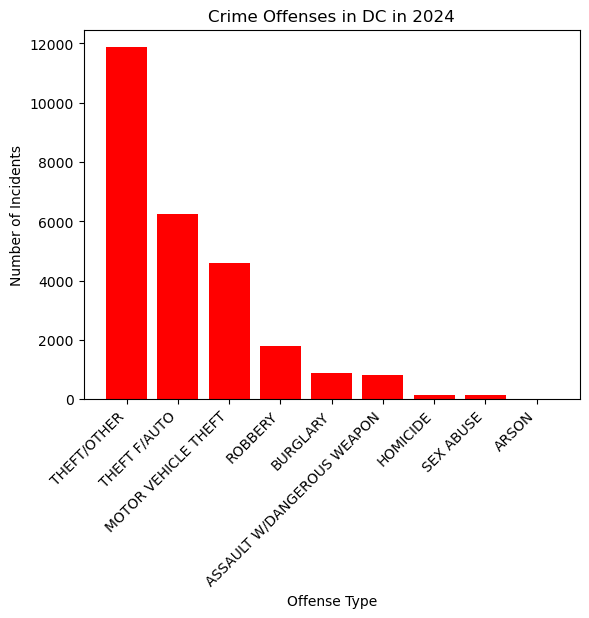

In [55]:
# Calculate offense makeup by percent
offense_counts = crime['offense'].value_counts()
total_incidents = offense_counts.sum()
crime_percentages = (offense_counts / total_incidents) * 100
#Print
for offense, percent in crime_percentages.items():
    print(f"{offense}: {percent:.2f}%")


# looking at different types of offenses
plt.bar(crime['offense'].value_counts().index, crime['offense'].value_counts().values, color='red')
plt.xlabel("Offense Type")
plt.ylabel("Number of Incidents")
plt.title("Crime Offenses in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()

## Crime type distribution
Theft-related crimes dominate the dataset, accounting for the majority of recorded incidents. Theft/Other is the most prevalent offense, with over 12,000 incidents, making up approximately 45% of all recorded crimes. Theft from Automobiles follows with around 7,000 cases (23% of total crimes). Motor Vehicle Theft ranks third, with nearly 5,000 incidents (17.5%). Robbery and Assault with a Dangerous Weapon occur far less frequently than theft-related offenses. Arson is the least common crime, making up just 0.01% of recorded incidents, followed by Sex Abuse and Homicide, both of which remain relatively rare compared to property crimes. Non-violent crimes account for over 95% of total reported offenses in DC in 2024.

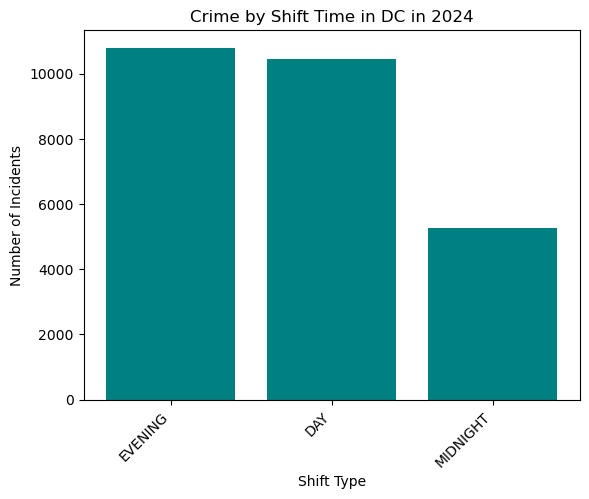

In [56]:
# looking at crimes for different shifts
plt.bar(crime['shift'].value_counts().index, crime['shift'].value_counts().values, color='teal')
plt.xlabel("Shift Type")
plt.ylabel("Number of Incidents")
plt.title("Crime by Shift Time in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()

## Crime Distribution by Time (Shift)

- Evening shift (3:00 PM – 11:00 PM) has the most incidents, with nearly 12,000 cases. This may be associated with rush hour occuring during this shift and covering early-night hours.

- Day shift (7:00 AM – 3:00 PM) follows closely behind, with approximately 11,000 incidents. This could be linked to people being more inclined to report events during the day.

- Midnight shift (11:00 PM – 7:00 AM) has the lowest number of incidents, at around 6,000 cases. This might suggest a lower number of crimes committed, however, crimes just might not be reported as often during this time.

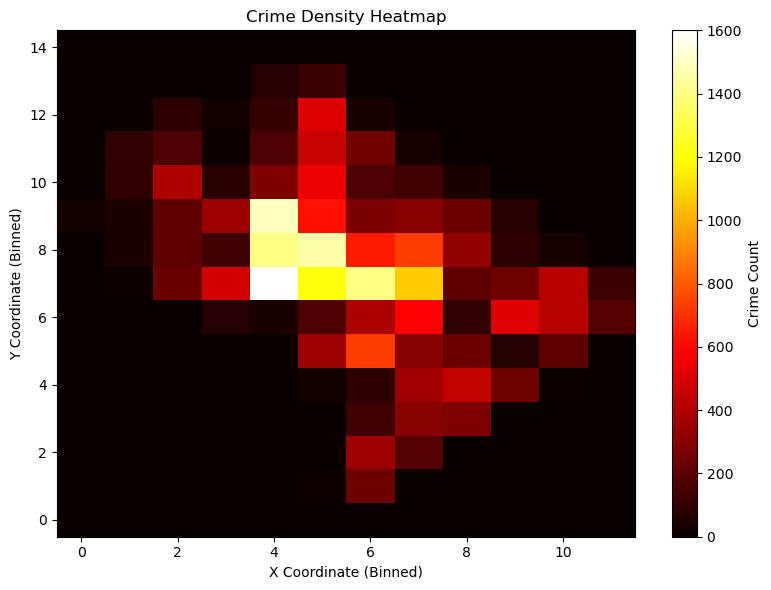

In [57]:
# Create heatmap of crime density by location

# Change bins to increase pattern visibilty in heat map
bin_size = 1500
crime['x_bin'] = (crime['x_coordinate'] // bin_size).astype(int)
crime['y_bin'] = (crime['y_coordinate'] // bin_size).astype(int)

# Group by binned coords and count
binned_df = crime.groupby(['y_bin', 'x_bin']).size().reset_index(name='crime_count')

# Pivot for heatmap
binned_heatmap = binned_df.pivot(index='y_bin', columns='x_bin', values='crime_count').fillna(0)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(binned_heatmap, cmap='hot', aspect='auto', origin='lower')
plt.colorbar(label='Crime Count')
plt.title('Crime Density Heatmap')
plt.xlabel('X Coordinate (Binned)')
plt.ylabel('Y Coordinate (Binned)')
plt.tight_layout()
plt.show()


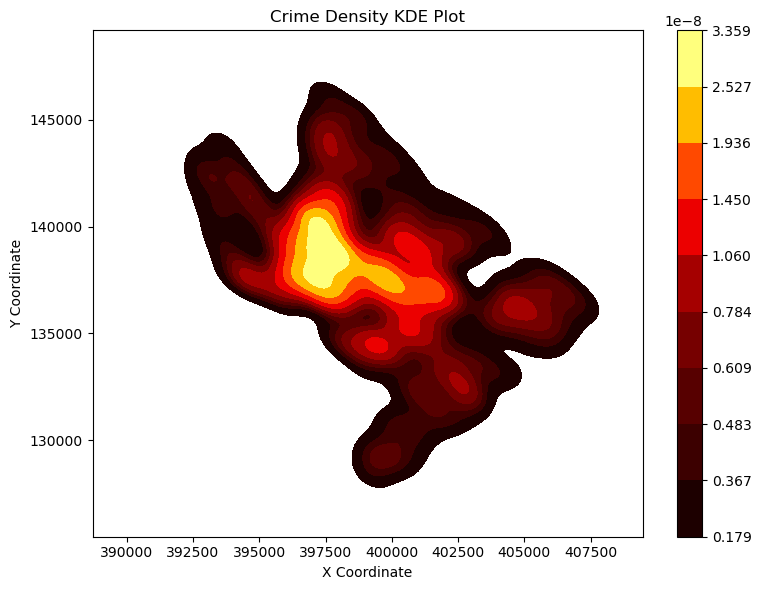

In [58]:
# Create KDE plot to represent crime density by location
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=crime['x_coordinate'], 
    y=crime['y_coordinate'], 
    fill=True, 
    cmap='hot',
    cbar=True,
    thresh=0.05
)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Crime Density KDE Plot')
plt.tight_layout()
plt.show()


 Note: Both of these graphs represent the same thing, kept both in to decide which is better

## Machine Learning

### XGBOOST

In [59]:
# XGBoosting for Predicting cluster

"""
X = crime.drop('cluster', axis=1)
y = crime['cluster']

# 2. Encode categorical features (like 'offense')
X_encoded = pd.get_dummies(X)  # one-hot encoding

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)"""


"\nX = crime.drop('cluster', axis=1)\ny = crime['cluster']\n\n# 2. Encode categorical features (like 'offense')\nX_encoded = pd.get_dummies(X)  # one-hot encoding\n\n# 3. Train-test split\nX_train, X_test, y_train, y_test = train_test_split(\n    X_encoded, y, test_size=0.2, random_state=42, stratify=y)"

## Linear Regression

In [60]:
#Linear Regression (time(hr) offense and (end time- start time ) to predict crime )


## Random Forest

The goal of this model is to figure out which features are helpful in predicting offense type. 

In [61]:
# Starting with creating a new dataframe to add variables to

crime2 = crime.copy()

# Convert string times to datetime and extract hour
crime2['start_hour'] = pd.to_datetime(crime2['start_time'], format='%H:%M:%S').dt.hour

# Encode categorical variables
categorical_cols = ['shift', 'method', 'ward', 'district', 'neighborhood_cluster']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    crime2[col] = le.fit_transform(crime2[col].astype(str))
    label_encoders[col] = le

# Encode the target variable
le_offense = LabelEncoder()
crime2['offense_encoded'] = le_offense.fit_transform(crime2['offense'])


features = ['shift', 'method', 'ward', 'district', 'x_bin', 'y_bin',
           'neighborhood_cluster', 'start_hour']


This code block just made new variables to be easier to work with. The possible features I will use to predict offense are shift, method, ward, district, x_bin, y_bin, neighborhood cluster, and start hour. I will eventually tune the random forest to find which features are the most important. 

Below is the first random forest I created. It uses all the variables, no max depth, and 100 trees.

In [62]:
X = crime2[features]
y = crime2['offense_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
clf = RandomForestClassifier(
    n_estimators=100, max_depth=None, 
    random_state=3870, n_jobs=-1).fit(
        X_train, y_train)
clf.score(X_test, y_test)

0.49132730015082954

An accuracy score of 0.49 is not very good. I will next modify the features to use as well as the depth and number of trees.

The next code block finds the importance of the different features.

In [63]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values(by = 'importance', ascending = False)

feat_imp

,feature,importance
7,start_hour,0.438238
1,method,0.111240
6,neighborhood_cluster,0.103613
4,x_bin,0.097652
5,y_bin,0.093547
0,shift,0.079616
2,ward,0.040645
3,district,0.035449


It seems as if only start hour is helpful in determining the type of crime. This is something I will need to look into more to find other helpful features. 

To improve accuracy, I will try to use a grid search using the code from class.

In [64]:
hyper_grid = {
    'n_estimators': [10, 50, 400, 500],
    'max_features': np.arange(1, len(features) + 1, 1).tolist(),
    'max_depth': [1, 10, 20, None]
}


# 5-fold cv partition
cv5 = KFold(n_splits = 5, shuffle = True, random_state = 3870)

# Forming the empty trees for each combo of parameters in hyper_grid
hp_grid_search = GridSearchCV(
    ensemble.RandomForestClassifier(random_state = 3870),
    hyper_grid,
    cv = cv5,
    scoring = 'accuracy',
    n_jobs = -1
)


In [65]:
hp_grid_search.fit(X = X_train, y = y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3870, shuffle=True),
             estimator=RandomForestClassifier(random_state=3870), n_jobs=-1,
             param_grid={'max_depth': [1, 10, 20, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 400, 500]},
             scoring='accuracy')

In [66]:
print(f'The best choice for the number of trees is {hp_grid_search.best_params_['n_estimators']}')
print(f'The best choice for the number of features is {hp_grid_search.best_params_['max_features']}')
print(f'The best choice for max depth is {hp_grid_search.best_params_['max_depth']}')
print(f'which has an accuracy of: {hp_grid_search.best_score_: .4f}')

The best choice for the number of trees is 500
The best choice for the number of features is 5
The best choice for max depth is 10
which has an accuracy of:  0.5366


Not much better accuracy. Need to reevaluate.